In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("dataset_fd_Sp_no-Mos.csv")

### Гипотеза
Количество заявок на пособие по безработице взаимосвязано с эпидемиологический обстановкой в регионе в период пандемии COVID19

In [6]:
df.head()

,week,region,oced,unemployed,cv_gender,cv_birthday_2000,cv_birthday_1990,cv_birthday_1980,cv_birthday_1970,cv_birthday_1960,...,infections,deaths,healed,tests,Rt,level,yandex_continuous,yandex_level,pass,federal_district
0,2020-04-06,Адыгея,Производство и строительство,19,18,0,3,12,19,19,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
1,2020-04-06,Адыгея,Производство и строительство,2,1,0,0,1,1,2,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
2,2020-04-06,Адыгея,"Финансы, страхование и юриспруденция",13,6,0,2,11,13,13,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
3,2020-04-06,Адыгея,Производство и строительство,9,2,1,2,6,9,9,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
4,2020-04-06,Адыгея,Административная и управленческая деятельность,17,8,0,3,14,17,17,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО


## проверим наличие зависимостей на уровне регион-неделя

In [64]:
agg_df = df.groupby(["region", "week"]).agg(infections=("infections", "mean"),
                                            unemployed=("unemployed", "sum"),
                                            population=("population", "mean"),
                                            federal_district=("federal_district", lambda x: x.iloc[0])).reset_index()

In [65]:
# отнормируем кол-во заявок на пособие по безработице и кол-во заражений в регионе на население
agg_df["infections"] = agg_df["infections"] / agg_df["population"]
agg_df["unemployed"] = agg_df["unemployed"] / agg_df["population"]

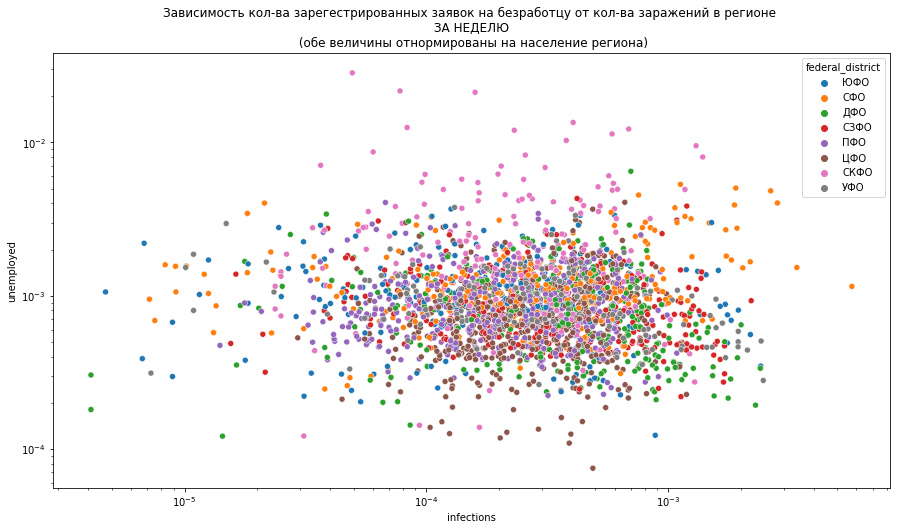

In [66]:
plt.figure(figsize=(15, 8))
plt.yscale("log")
plt.xscale("log")
sns.scatterplot(data = agg_df, x="infections", y="unemployed", hue="federal_district")
plt.title("Зависимость кол-ва зарегестрированных заявок на безработцу от кол-ва заражений в регионе \n ЗА НЕДЕЛЮ \n (обе величины отнормированы на население региона)")
None

посчитаем корелляцию кол-ва зарегестрированных заявок на безработцу от кол-ва заражений в регионе за неделю

In [53]:
np.corrcoef(agg_df[["infections", "unemployed"]].transpose())

array([[ 1.        , -0.01490222],
       [-0.01490222,  1.        ]])

Ярко выраженной зависимости ожидаемо нет, так как согласно механизму заболеваемость *отложенно* влияет на экономику региона

## проверим наличие зависимостей на уровне различных регионов
Оценим суммарное кол-во зарегестрированных случаев
?Будем считать что оно высоко коррелирует с реальной эпидемиологической обстановкой
Посчитаем на суммарное кол-ве поданных заявок на пособие по безработице
Посмотрим на корелляцию данных величин

In [68]:
agg_df = df.groupby(["region", "week"]).agg(infections=("infections", "mean"),
                                            unemployed=("unemployed", "sum"),
                                            population=("population", "mean"),
                                            federal_district=("federal_district", lambda x: x.iloc[0]))

In [69]:
agg_df = agg_df.groupby("region").agg(sum_infections=("infections", "sum"),
                             sum_unemployed=("unemployed", "sum"),
                             population=("population", "mean"),
                             federal_district=("federal_district", lambda x: x.iloc[0]))


In [70]:
# отнормируем кол-во заявок на пособие по безработице и кол-во заражений в регионе на население
agg_df["sum_infections"] = agg_df["sum_infections"] / agg_df["population"]
agg_df["sum_unemployed"] = agg_df["sum_unemployed"] / agg_df["population"]

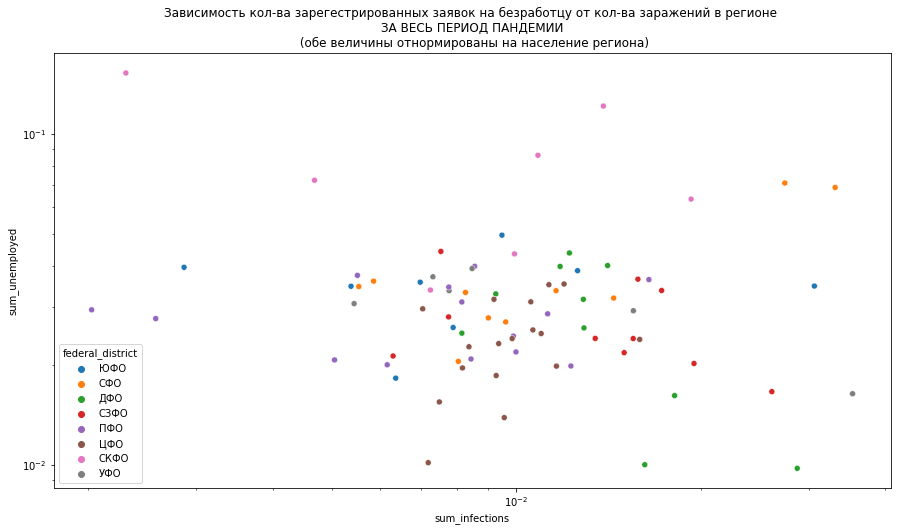

In [72]:
plt.figure(figsize=(15, 8))
plt.yscale("log")
plt.xscale("log")
sns.scatterplot(data = agg_df, x="sum_infections", y="sum_unemployed", hue="federal_district")
plt.title("Зависимость кол-ва зарегестрированных заявок на безработцу от кол-ва заражений в регионе \n ЗА ВЕСЬ ПЕРИОД ПАНДЕМИИ \n (обе величины отнормированы на население региона)")
None

In [73]:
np.corrcoef(agg_df[["sum_infections", "sum_unemployed"]].transpose())

array([[ 1.        , -0.02744763],
       [-0.02744763,  1.        ]])

Значимого уровня корреляции между исследуемыми показателями не найдено

## регрессионный анализ
Чтобы проверить наличие взаимосвязи между количеством заявок на пособие по безработице и регистрируемым количеством заболеваний воспользуемся оценкой модели со случайными эффектами

предпосылки к использованию модели со случаынйми эффектами - ?
какие тесты надо дополнительно провести?

In [ ]:
# !pip install linearmodels

In [5]:
from linearmodels.panel import PanelOLS, RandomEffects

In [71]:
import random

df_panel = df.copy()
df_panel["week"] = pd.to_datetime(df_panel["week"])
df_panel["random"] = [random.randint(0, 100) for i in range(len(df_panel))]
df_panel = df_panel.groupby(["region", "week"]).agg(sum_infections=("infections", "mean"),
                                                    sum_unemployed=("unemployed", "sum"),
                                                    sum_deaths=("deaths", "mean"),
                                                    rnd_var=("random", "mean")
                                                    )

In [77]:
df_panel.to_csv("dataset_agregared.csv")

In [72]:
df_panel

sum_infections  sum_unemployed  sum_deaths    rnd_var
region      week                                                             
Адыгея      2020-04-06            42.0             454         0.0  54.733333
            2020-04-13           278.0            1550         2.0  52.968750
            2020-04-20            80.0            1233         2.0  43.062500
            2020-04-27            42.0             993         1.0  49.393939
            2020-05-04            21.0             512         0.0  50.000000
...                                ...             ...         ...        ...
Ярославская 2020-09-28           345.0             790         1.0  58.750000
            2020-10-05           167.0             733         0.0  51.433333
            2020-10-12           611.0             677         0.0  53.800000
            2020-10-19           677.0             691         2.0  51.407407
            2020-10-26           770.0             424         6.0  59.896552

[2460 rows x 4 columns]

In [80]:

dependent_variable = 'sum_unemployed'
explanatory_variables = ['sum_infections', 'sum_deaths', "rnd_var"]
individual_variable = 'region'
time_variable = 'week'

# Модель с фиксированными эффектами
model_fe = PanelOLS.from_formula(f'{dependent_variable} ~ {"+".join(explanatory_variables)} + EntityEffects', df_panel)

# Модель со случайными эффектами
model_re = RandomEffects.from_formula(f'{dependent_variable} ~ {"+".join(explanatory_variables)}', df_panel)

# Оцените обе модели
results_fe = model_fe.fit()
results_re = model_re.fit()



In [81]:
print(results_re)

                        RandomEffects Estimation Summary                        
Dep. Variable:         sum_unemployed   R-squared:                        0.0477
Estimator:              RandomEffects   R-squared (Between):              0.5183
No. Observations:                2460   R-squared (Within):               0.0048
Date:                Sun, Dec 10 2023   R-squared (Overall):              0.3453
Time:                        23:23:04   Log-likelihood                -2.187e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      41.029
Entities:                          82   P-value                           0.0000
Avg Obs:                       30.000   Distribution:                  F(3,2457)
Min Obs:                       30.000                                           
Max Obs:                       30.000   F-statistic (robust):             41.029
                            

In [82]:
print(results_fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:         sum_unemployed   R-squared:                        0.0113
Estimator:                   PanelOLS   R-squared (Between):              0.1155
No. Observations:                2460   R-squared (Within):               0.0113
Date:                Sun, Dec 10 2023   R-squared (Overall):              0.0804
Time:                        23:23:04   Log-likelihood                -2.181e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      9.0096
Entities:                          82   P-value                           0.0000
Avg Obs:                       30.000   Distribution:                  F(3,2375)
Min Obs:                       30.000                                           
Max Obs:                       30.000   F-statistic (robust):             9.0096
                            

In [67]:
from statsmodels.datasets import grunfeld

data = grunfeld.load_pandas().data
data = data.set_index(["firm", "year"])
data.head()

invest   value  capital
firm           year                           
General Motors 1935.0   317.6  3078.5      2.8
               1936.0   391.8  4661.7     52.6
               1937.0   410.6  5387.1    156.9
               1938.0   257.7  2792.2    209.2
               1939.0   330.8  4313.2    203.4

In [39]:
from linearmodels import PanelOLS

mod = PanelOLS.from_formula("invest ~ value + capital + EntityEffects", data=data)
print(mod.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:                 invest   R-squared:                        0.7667
Estimator:                   PanelOLS   R-squared (Between):              0.8223
No. Observations:                 220   R-squared (Within):               0.7667
Date:                Sun, Dec 10 2023   R-squared (Overall):              0.8132
Time:                        22:31:09   Log-likelihood                   -1167.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      340.08
Entities:                          11   P-value                           0.0000
Avg Obs:                       20.000   Distribution:                   F(2,207)
Min Obs:                       20.000                                           
Max Obs:                       20.000   F-statistic (robust):             340.08
                            

In [30]:
f'{dependent_variable} ~ {"+".join(explanatory_variables)} + EntityEffects'

'sum_unemployed ~ sum_infections + EntityEffects'